# Titanic

Found in [kaggle/titanic](https://www.kaggle.com/c/titanic)

<img style="float: left;" src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/logos/front_page.png">

## 1. Load the data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from collections import Counter
from __future__ import division

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## 2. Show the data

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Plot the data

A first total view on the data can be shown through a collection of histograms (at least for the features that are numeric):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A405358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A888F60>]], dtype=object)

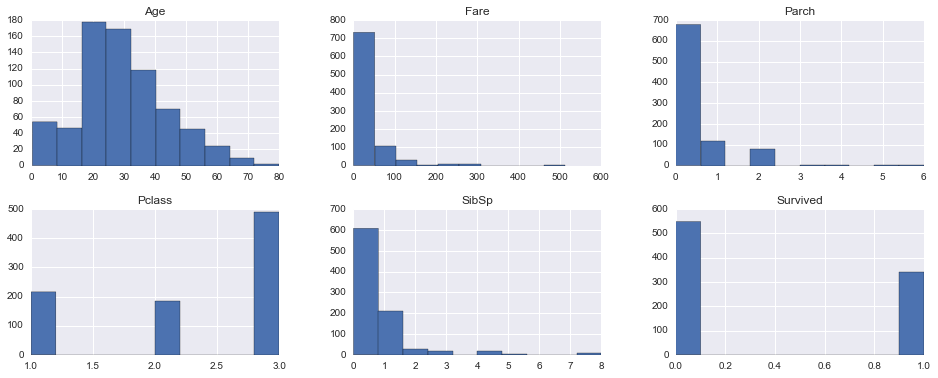

In [5]:
train.drop(["PassengerId"],axis=1).hist(figsize=(16,6),layout=(2,3))

From the description of the problem (and the documentaries about Titanic) it _seems_ there is a correlation of survival between the sex and the fare/cabin of the passenger. These can be explored in the plots below: 

In [6]:
train.groupby(["Sex","Survived"]).count()["PassengerId"].unstack(["Survived"]).apply(lambda x: 100*x/float(x.sum()),axis=1)

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


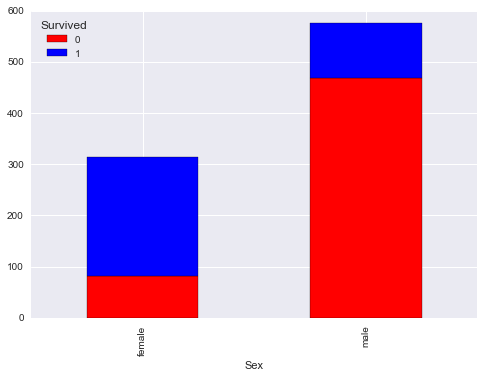

In [7]:
train.groupby(["Sex","Survived"]).count()["PassengerId"].unstack(["Survived"]).plot.bar(stacked=True,color=["r",["b"]])

It seems there is indeed a connection between the sex of the passengers and their survival rate.

In [8]:
train.groupby(["Pclass","Survived"]).count()["PassengerId"].unstack(["Survived"]).apply(lambda x: 100*x/float(x.sum()),axis=1)

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


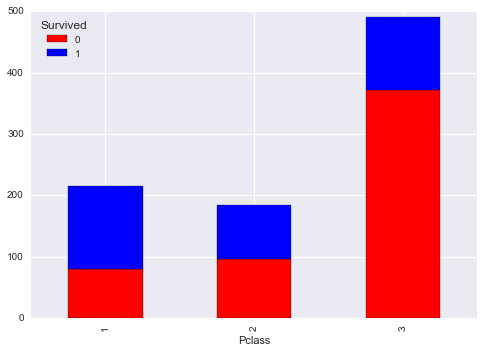

In [9]:
train.groupby(["Pclass","Survived"]).count()["PassengerId"].unstack(["Survived"]).plot.bar(stacked=True,color=["r",["b"]])

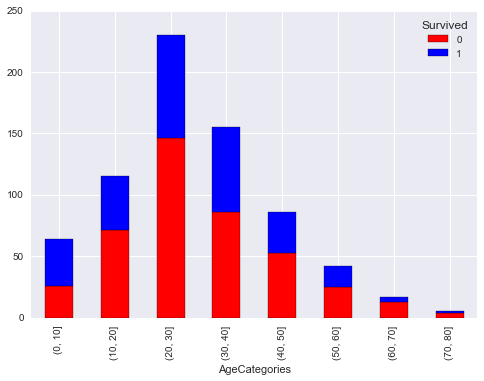

In [10]:
train["AgeCategories"] = pd.cut(train["Age"],bins=range(0,90,10),precision=1)
train.groupby(["AgeCategories","Survived"]).count()["PassengerId"].unstack(["Survived"]).plot.bar(stacked=True,color=["r",["b"]])
train = train.drop("AgeCategories",axis=1)

## 4. Clean the data

From the current data the name and ticket number is deemed to be unimportant for the moment. Also, the Sex will become an integer (1 for female and 0 for male), the embarkement place (0 for S, 1 for C and 2 for Q) and the cabin (0 for people without cabin, 1 with cabin - regardless of the number))  
_(cleaning up by using panda methods apply, drop and replace)_

In [11]:
ctrain = train.drop(["Name","Ticket"],axis=1).replace({"Sex": {"female": 1, "male":0}})
ctrain["Cabin"]=ctrain["Cabin"].apply(lambda x: 1 if pd.notnull(x) else 0)
def embarked_letters_to_integers(letter):
    if letter == "S":
        return 0
    elif letter == "C":
        return 1
    elif letter == "Q":
        return 2
ctrain["Embarked"] = ctrain["Embarked"].apply(embarked_letters_to_integers)

The other possible way as suggested by the **get started** section is to use the _map_. This is actually more semantically correct, as map works elementwise (on sections) while apply works on columns/rows of a dataframe (e.g. apply(lambda x: x.max-x.min))

In [12]:
train["Gender"] = train["Sex"].map({"female":0,"male":1}).astype(int)
train["Origin"] = train["Embarked"].map({"S":0,"C":1,"Q":2}).fillna(0).astype(int)
train["hasCabin"] = train["Cabin"].map(lambda x: 0 if pd.isnull(x) else 1)

Also, the Age variable contains a number of NaN values which should be addressed. Since cleaning them completely will not be appropriate for the machine learning methods to be used later, it is deemed best to use an average value. Following the get started section, there is a difference in the average values for each gender and Pclass. This is calculated in the following:

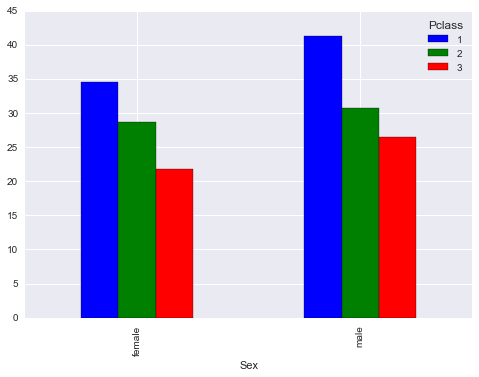

In [13]:
mean_age_per_sex_class = train.groupby(["Sex","Pclass"]).mean()["Age"]
mean_age_per_sex_class.unstack("Pclass").plot.bar()

The Age is then filled by using the above criteria. A note of which rows are filled with this are kept in the "AgeIsNull" column, in integer format.

In [14]:
train["AgeFill"] = train["Age"]
train["AgeIsNull"] = pd.isnull(train["Age"]).astype(int)
for sex in ["male","female"]:
    for pclass in [1,2,3]:
        train.loc[train.Age.isnull() & (train.Sex==sex) & (train.Pclass==pclass),"AgeFill"] = mean_age_per_sex_class[sex][pclass]

Then the dataset becomes:  
_(note the difference between the means of Age and AgeFill)_

In [15]:
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Origin,hasCabin,AgeFill,AgeIsNull
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.0
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20,0.65,0.36,0.23,29.32,0.2
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69,0.48,0.64,0.42,13.28,0.4
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.0
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91,0.00,0.00,0.00,21.75,0.0
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45,1.00,0.00,0.00,26.51,0.0
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00,1.00,1.00,0.00,36.00,0.0
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33,1.00,2.00,1.00,80.00,1.0


## 5. Feature engineering

As suggested by the [Get Started with Python II guide][Guide II] some additional features will be created by combining existing features. These will be: 
* the _FamilySize_, created to accumulate the siblings and children/parent of each passenger.
* the _Age*Pclass_, a combined metric of the Age and Pclass which can be used to examine the observation, that older and class 3 people were less likely to survive. 

In [16]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
train[["FamilySize","SibSp","Parch"]].head(10)

,FamilySize,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
5,0,0,0
6,0,0,0
7,4,3,1
8,2,0,2
9,1,1,0


In [17]:
train["Age*Pclass"] = train["AgeFill"] * train["Pclass"]
train[["Age*Pclass","AgeFill","Pclass"]].head(10)

,Age*Pclass,AgeFill,Pclass
0,66.000000,22.000000,3
1,38.000000,38.000000,1
2,78.000000,26.000000,3
3,35.000000,35.000000,1
4,105.000000,35.000000,3
5,79.522767,26.507589,3
6,54.000000,54.000000,1
7,6.000000,2.000000,3
8,81.000000,27.000000,3
9,28.000000,14.000000,2


## 6. Final preparations for sklearn

First we need to remove the features that contain text information (as sklearn cannot process them):

In [18]:
text_info_columns = train.dtypes[train.dtypes.map(lambda x: x=='object')].index.tolist()
train = train.drop(text_info_columns,axis=1)
text_info_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Also the Age column is removed as it contains NaN values that were filled in the AgeFill column:

In [19]:
train = train.drop("Age",axis=1)

Therefore the remaining columns are all numeric:

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Gender         891 non-null int32
Origin         891 non-null int32
hasCabin       891 non-null int64
AgeFill        891 non-null float64
AgeIsNull      891 non-null int32
FamilySize     891 non-null int64
Age*Pclass     891 non-null float64
dtypes: float64(3), int32(3), int64(7)
memory usage: 87.0 KB


To have a better idea of the features, a histogram is printed for each column of the cleaned dataset:

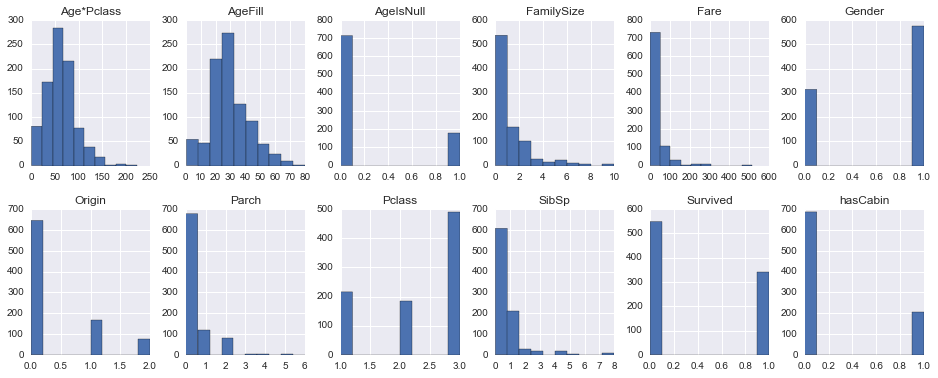

In [21]:
train.drop(["PassengerId"],axis=1).hist(figsize=(16,6),layout=(2,6));

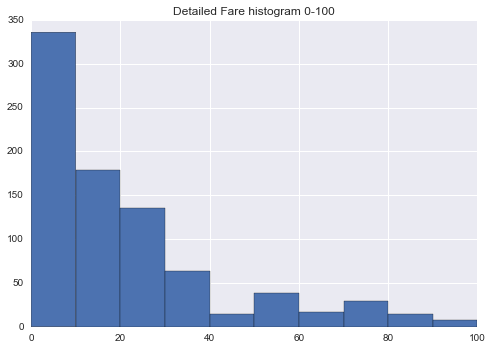

In [22]:
train.Fare.hist(range=(0,100));plt.title("Detailed Fare histogram 0-100")

Also, the correlation matrix is created for the cleaned set of variables. It shows that indeed there might be a stronger correlation with Sex and Pclass.

In [23]:
train.corr().round(2)["Survived"]

PassengerId   -0.01
Survived       1.00
Pclass        -0.34
SibSp         -0.04
Parch          0.08
Fare           0.26
Gender        -0.54
Origin         0.11
hasCabin       0.32
AgeFill       -0.07
AgeIsNull     -0.09
FamilySize     0.02
Age*Pclass    -0.34
Name: Survived, dtype: float64

Finally, the numpy raw data is extracted from the pandas dataframe:

In [24]:
train_data = train.values
train_data

array([[   1.  ,    0.  ,    3.  , ...,    0.  ,    1.  ,   66.  ],
       [   2.  ,    1.  ,    1.  , ...,    0.  ,    1.  ,   38.  ],
       [   3.  ,    1.  ,    3.  , ...,    0.  ,    0.  ,   78.  ],
       ..., 
       [ 889.  ,    0.  ,    3.  , ...,    1.  ,    3.  ,   65.25],
       [ 890.  ,    1.  ,    1.  , ...,    0.  ,    0.  ,   26.  ],
       [ 891.  ,    0.  ,    3.  , ...,    0.  ,    0.  ,   96.  ]])

[Guide II]: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii